#Part 01

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) # Return the unique elements of a tratining output set and take it length as Classes
Ntr = x_train.shape[0] # number of training examples
Nte = x_test.shape[0] # number of testing examples
Din = 3072 # By CIFAR10 data set with 32 x 32 x 3 color images

# Normalize pixel values: Image data preprocessing
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0) # axis=0: mean of a column; Mean of each pixel
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K) # This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

#reshape/flatten the data
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (50000, 3072)
x_test: (10000, 3072)
y_train: (50000, 10)
y_test: (10000, 10)


In [18]:
batch_size = Ntr # for gradient descent optimization batch size is equal to number of training set
iterations = 5 # epochs
lr = 1.4e-2 # the learning rate alpha
lr_decay= 0.999
reg = 5e-6 #the regularization constant - lamda

In [30]:
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history = []

std=1e-5 # standard deviation of normal distributaion
w1 = std*np.random.randn(Din, K) # initialize the w matrix with random values
b1 = np.zeros(K)

for t in range(iterations):
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]

    #forward 
    y_pred = x.dot(w1) + b1
    y_pred_test = x_test.dot(w1) + b1
    
    loss = (1/batch_size)*(np.square(y - y_pred)).sum() + reg*(np.sum(w1*w1))
    loss_history.append(loss)
    
    # compute the accuracy as percentage
    training_acc = 100*(1 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum())  
    testing_acc = 100*(1 - (1/(batch_size*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum())
    train_acc_history.append(training_acc)
    val_acc_history.append(testing_acc)

    if t%1 == 0:
        print("iteration %d / %d: loss %f: training accuracy %f: testing accuracy %f" % (t, iterations, loss, training_acc, testing_acc))

    # Backward 
    dy_pred = (1./batch_size)*2.0*(y_pred-y) # partial derivative w.r.t y_predicted
    dw1 = x.T.dot(dy_pred) + reg*w1
    db1 = dy_pred.sum(axis=0)
    #updating learning parameters
    w1 -= lr*dw1 
    b1 -= lr*db1
    lr *= lr_decay
    
    lr_history.append(lr)

iteration 0 / 5: loss 1.000010: training accuracy 65.503600: testing accuracy 93.129400
iteration 1 / 5: loss 0.958815: training accuracy 71.331000: testing accuracy 94.365200
iteration 2 / 5: loss 0.938246: training accuracy 73.736200: testing accuracy 94.807600
iteration 3 / 5: loss 0.925573: training accuracy 73.768600: testing accuracy 94.825800
iteration 4 / 5: loss 0.914463: training accuracy 74.485200: testing accuracy 94.972800


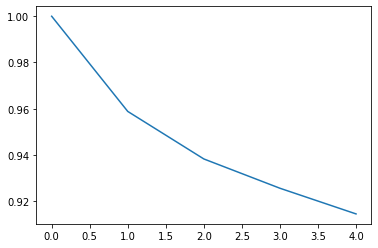

In [31]:
plt.plot(loss_history)

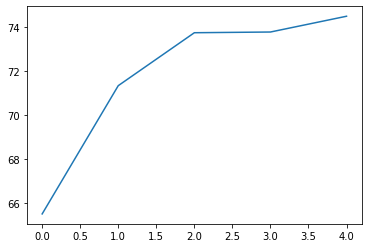

In [32]:
plt.plot(train_acc_history)

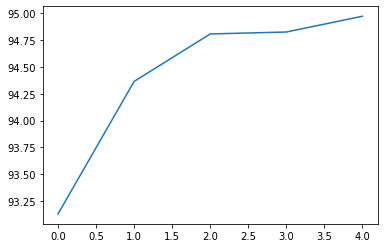

In [33]:
plt.plot(val_acc_history)

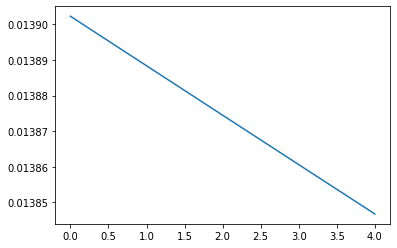

In [34]:
plt.plot(lr_history)